In [8]:
from random import random
from random import expovariate as expo
import numpy as np
import pandas as pd

class P:
	def __init__(self,salida,llegada):
		self.llegada = llegada
		self.salida = salida
	def cont(self,x):
		if self.salida<=x and x<self.llegada:
			return x

class P1:
	def __init__(self,numero):
		self.numero = numero
	def cont(self,x):
		if self.numero<=x:
			return x


def lineaE():
	t0 = 0
	l0 = [] # tiempos de interllegada
	l1 = [] # tiempo de llegada
	l2 = [] # tiempo de servicio
	l3 = [] # inicio del servicio
	l4 = [] # fin del servicio
	c  = [] # clientes en la fila

	s = 0 # total de clientes en la fila
	k = 0 # indice

	for i in range(55):
		t = expo(1/3)
		l0.append(t)

		t0+=t
		l1.append(t0) # llegadas

		# clientes
		if i==0:
			c.append(s)
		elif t0<l4[k]:
			s+=1 # contar clientes que llegan
			c.append(s)
		elif t0>l4[k]:
			# clientes que se fueron
			w = len(list(filter(P(l4[k],t0).cont,l4)))

			# total de la fila
			j = len(list(filter(P1(l4[k]).cont,l4)))
			k+=w

			if s>0:
				s=j-w
				c.append(s)
			else:
				s=0
				c.append(s)

		if i==0: # inicio del servicio
			t1 = t
			l2.append(t1)
		else:
			t1 = max(l4[i-1],t0)
			l2.append(t1)

		u = 3*random()+1 # distribucion del servicio
		l3.append(u) # servicio

		l4.append(t1+u) # fin del servicio

	return pd.DataFrame(np.round([l0,l1,c,l2,l3,l4],2).T,
	columns=[
	"t",
	"t. de llegada",
	"clientes",
	"inicio de ser.",
	"t. ser.",
	"fin de ser."])

simu = lineaE()
simu

,t,t. de llegada,clientes,inicio de ser.,t. ser.,fin de ser.
0,5.68,5.68,0.0,5.68,2.92,8.61
1,0.44,6.12,1.0,8.61,3.46,12.06
2,2.69,8.81,1.0,12.06,2.93,15.00
3,2.35,11.16,2.0,15.00,3.21,18.21
4,3.08,14.25,2.0,18.21,3.07,21.28
5,0.84,15.09,2.0,21.28,3.66,24.94
6,0.21,15.30,3.0,24.94,1.18,26.12
7,0.13,15.43,4.0,26.12,2.59,28.71
8,0.30,15.73,5.0,28.71,1.87,30.59
9,0.97,16.70,6.0,30.59,2.25,32.84


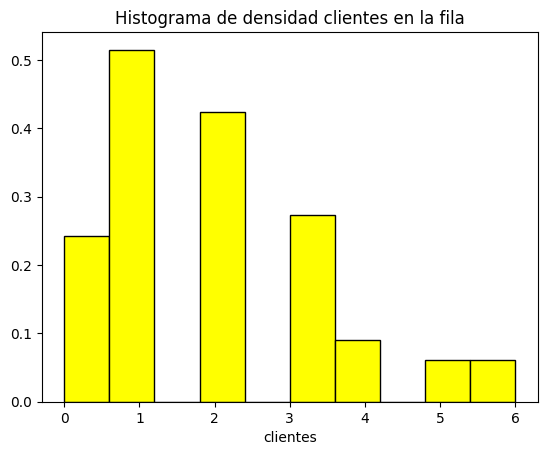

In [11]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.hist(simu['clientes'],color='yellow',density=True,edgecolor='black')
plt.title("Histograma de densidad clientes en la fila")
plt.xlabel("clientes")
plt.show()